In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from cifar import *

# Dataset Tutorial

In [4]:
X_train, y_train, X_test, y_test = load_CIFAR10()

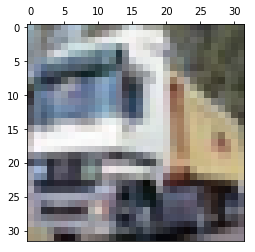

In [3]:
show(X_train[1])

In [5]:
X_train_1d = X_train.reshape(X_train.shape[0], -1)
X_test_1d = X_test.reshape(X_test.shape[0], -1)

In [6]:
X_train_s, y_train_s = resample(
    X_train_1d, y_train, replace=False, n_samples=5000, random_state=0
)

# SVM

In [19]:
model = SVC(kernel='poly',degree=3)
model.fit(X_train_s, y_train_s)
y_pred = model.predict(X_test_1d)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.43      0.45      0.44      1000
          1       0.50      0.44      0.46      1000
          2       0.26      0.30      0.28      1000
          3       0.23      0.27      0.25      1000
          4       0.32      0.32      0.32      1000
          5       0.31      0.35      0.33      1000
          6       0.43      0.35      0.39      1000
          7       0.46      0.39      0.42      1000
          8       0.51      0.57      0.54      1000
          9       0.47      0.41      0.44      1000

avg / total       0.39      0.38      0.39     10000



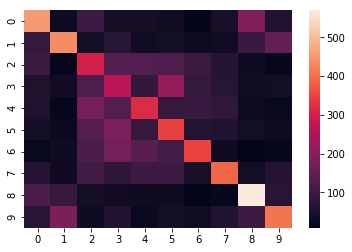

In [20]:
mat = confusion_matrix(y_test, y_pred, labels=list(range(10)))
sns.heatmap(mat)

# Neural Network

In [31]:
model = MLPClassifier(hidden_layer_sizes=(800,200), random_state=0)
model.fit(X_train_1d, y_train)
y_pred = model.predict(X_test_1d)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.48      0.62      0.54      1000
          1       0.48      0.73      0.58      1000
          2       0.31      0.43      0.36      1000
          3       0.33      0.31      0.32      1000
          4       0.47      0.31      0.37      1000
          5       0.42      0.29      0.34      1000
          6       0.51      0.52      0.51      1000
          7       0.52      0.50      0.51      1000
          8       0.77      0.35      0.48      1000
          9       0.46      0.51      0.49      1000

avg / total       0.48      0.46      0.45     10000



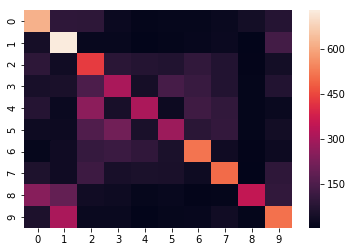

In [32]:
mat = confusion_matrix(y_test, y_pred, labels=list(range(10)))
sns.heatmap(mat)

# Random Forest

In [33]:
model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_1d, y_train)
y_pred = model.predict(X_test_1d)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.58      0.58      0.58      1000
          1       0.55      0.57      0.56      1000
          2       0.43      0.34      0.38      1000
          3       0.39      0.29      0.33      1000
          4       0.44      0.41      0.42      1000
          5       0.46      0.43      0.44      1000
          6       0.48      0.62      0.54      1000
          7       0.53      0.49      0.51      1000
          8       0.60      0.64      0.62      1000
          9       0.48      0.59      0.53      1000

avg / total       0.49      0.50      0.49     10000



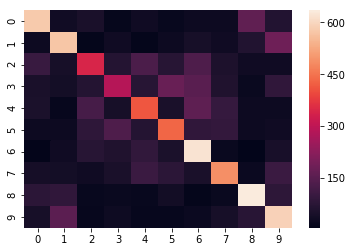

In [34]:
mat = confusion_matrix(y_test, y_pred, labels=list(range(10)))
sns.heatmap(mat)

# GBDT

In [42]:
import lightgbm as lgb
model = lgb.LGBMClassifier(boosting_type='gbdt', n_estimators=1000)
model.fit(X_train_1d, y_train)
y_pred = model.predict(X_test_1d)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.66      0.67      1000
          1       0.72      0.68      0.70      1000
          2       0.48      0.47      0.48      1000
          3       0.42      0.44      0.43      1000
          4       0.54      0.48      0.51      1000
          5       0.51      0.50      0.51      1000
          6       0.61      0.69      0.65      1000
          7       0.66      0.63      0.64      1000
          8       0.70      0.73      0.72      1000
          9       0.63      0.66      0.64      1000

avg / total       0.60      0.60      0.59     10000



/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


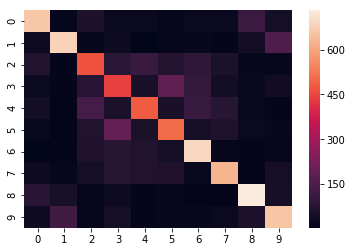

In [43]:
mat = confusion_matrix(y_test, y_pred, labels=list(range(10)))
sns.heatmap(mat)

# CNN

In [7]:
import keras

In [30]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)

In [42]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)          0         
__________

In [43]:
model.fit(X_train, y_train_onehot, epochs=50)
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

Epoch 1/50
50000/50000 [==============================] - 20s 405us/step - loss: 7.2389 - acc: 0.1819
Epoch 2/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.6530 - acc: 0.3957
Epoch 3/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.4735 - acc: 0.4703
Epoch 4/50
50000/50000 [==============================] - 20s 392us/step - loss: 1.3753 - acc: 0.5108
Epoch 5/50
50000/50000 [==============================] - 20s 396us/step - loss: 1.3106 - acc: 0.5406
Epoch 6/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.2600 - acc: 0.5576
Epoch 7/50
50000/50000 [==============================] - 20s 392us/step - loss: 1.2153 - acc: 0.5762
Epoch 8/50
50000/50000 [==============================] - 20s 396us/step - loss: 1.1714 - acc: 0.5908
Epoch 9/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.1451 - acc: 0.6009
Epoch 10/50
50000/50000 [==============================] - 20s 393us/step - loss: 

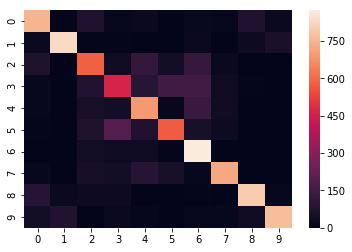

In [44]:
mat = confusion_matrix(y_test, y_pred, labels=list(range(10)))
sns.heatmap(mat)